# Imports

In [1]:
import os
import time
import random
import numpy as np

import tensorflow as tf
import tensorflow.contrib.layers as layers

import gym
from gym import spaces
from PIL import Image
from collections import deque, namedtuple


from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from environments import Snake
from methods import QNetwork, ReplayMemory
from agents import SnakeDQNAgent, SnakeDQNAgentFisherI, SnakeDistDQNAgent

# NN training

In [3]:
aa = SnakeDQNAgentFisherI(model_name="dqn/boltzmann2_8x8e999_5d_stupid", state_shape=[8, 8, 5])
#aa = SnakeDistDQNAgent(model_name="distdqn_boltzmann_8x8e999", state_shape=[8, 8, 5], num_atoms=51)

Constructing symbolic matvecs...
Done


In [4]:
aa.set_parameters(max_episode_length=2000, replay_memory_size=100000, replay_start_size=10000,
                  discount_factor=0.999, final_eps=0.01, annealing_steps=500000)

In [ ]:
aa.train(gpu_id=1, exploration="boltzmann", save_freq=1000000, max_num_epochs=50)

1.8083260863417496
2.3208453294330207
2.1067109422199732
2.175726679292428


/workspace/snake_research/agents.py:606: RuntimeWarning: invalid value encountered in true_divide
  x0[i] = x_ / a


0.0
3.044077523095397
0.0
1.2958174180829867
1.7490361453217977
2.401487121647368
2.5137890105452074
2.5974987470144697
2.213146497132817
2.038766114068154
0.0
0.0
2.1656786724798707
1.9873639755674113
2.1748233127993326
2.3155285031121076
0.0
1.5737559300180182
2.0225612564658197
1.932364571886467
1.4728205450128313
2.138217104769159
2.0140355978103637
0.0
1.5106503568688008
1.7701832433563611
1.7548847948864277
1.605839975501313
1.2318439598892443
1.5263778134901174
1.5500697305705837
1.5848609859962786
2.226105242771936
1.84174816412855
2.2301350099767507
2.019120195157343
1.9900003437783882
1.9212054817400592
1.8293946251066098
1.9794572639128054
1.4212898938361136
0.0
1.7784675660848273
2.406647147577154
2.107606048633022
2.177040282986065
2.2845724297558845
1.8623552104156378
0.0
2.365035615541319
1.9928091239134398
0.0
2.293718519206722
1.9846743863125365
1.8533205606078402
2.282853493300006
1.8905194299798633
1.3939631857818346
1.4541791933360215
1.6749874582389788
2.0091704055

# Visualization

In [20]:
from_epoch = 50

In [21]:
aa.eps = 1e-2

In [22]:
%%time
st, rew, actions = aa.play_n_episodes_with_actions_and_rewards(num_episodes=20, gpu_id=1, max_episode_length=2000, 
                             exploration='boltzmann', from_epoch=from_epoch)

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50
CPU times: user 12.1 s, sys: 1.02 s, total: 13.1 s
Wall time: 11.2 s


In [8]:
def s2im(arr):
    return sum([arr[:,:,i]*(i+1) for i in np.arange(5)]) 

In [8]:
%%time
st, rew = aa.play_n_episodes(num_episodes=100, gpu_id=1, max_episode_length=2000, 
                             exploration='boltzmann', from_epoch=from_epoch)

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50
CPU times: user 1min 46s, sys: 14.5 s, total: 2min 1s
Wall time: 1min 13s


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  5., 93.]),
 array([ 8. , 13.3, 18.6, 23.9, 29.2, 34.5, 39.8, 45.1, 50.4, 55.7, 61. ]),
 <a list of 10 Patch objects>)

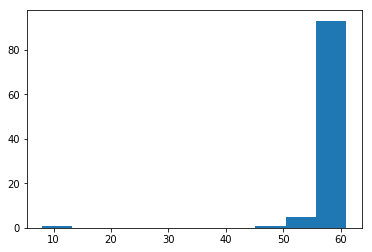

In [20]:
plt.hist(rew)

In [21]:
(np.array(rew)==61).sum()

86

In [22]:
np.mean(rew)

59.78

In [23]:
np.argsort(rew)

array([81, 34, 64, 72, 54, 23, 82, 85,  0, 48, 44, 24, 51, 96, 87, 93, 66,
       65, 94, 63, 62, 61, 60, 59, 58, 95, 57, 56, 55, 97, 67, 86, 68, 70,
       84, 83, 88, 89, 80, 79, 78, 69, 77, 90, 91, 53, 74, 73, 92, 71, 76,
       75, 49, 50, 20, 19, 18, 17, 16, 15, 14, 13, 12, 21, 11,  9,  8,  7,
        6,  5,  4,  3,  2,  1, 10, 52, 22, 26, 98, 47, 46, 45, 43, 42, 41,
       40, 39, 25, 38, 36, 35, 33, 32, 31, 30, 29, 28, 27, 37, 99])

In [24]:
np.array(rew)[np.argsort(rew)]

array([ 8, 49, 52, 53, 55, 55, 55, 56, 57, 58, 58, 58, 59, 59, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61,
       61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61])

In [25]:
len(st[71])

793

In [26]:
grad[num][0][0][0].shape

NameError: name 'num' is not defined

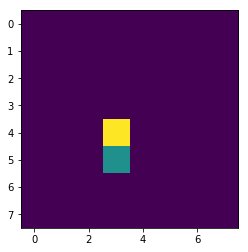

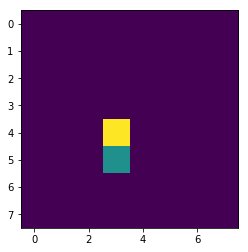

In [126]:
num = 71
start = 750
for time_step in range(start, len(st[num])):
    state = st[num][time_step]
    #state = grad[num][time_step][0][0]
    img = sum([state[:,:,i]*(i+1) for i in [0, 1, 3, 4]])
    if time_step % 1 == 0:
        plt.imshow(img)
        display.clear_output(wait=True)
        display.display(plt.gcf())

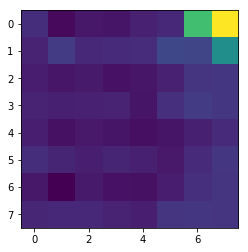

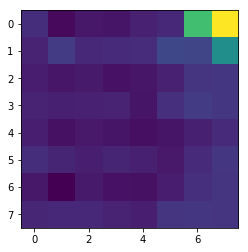

In [127]:
#num = 98
start = 0
norms = []
for time_step in range(start, len(st[num])-1):
    #state = st[num][time_step]
    state = grad[num][time_step][0][0]
    norm = np.linalg.norm(state)
    norms.append(norm)
    img = sum([state[:,:,i]*(i+1) for i in [0, 1, 3, 4]])
    if time_step % 100 == 0:
        plt.imshow(img)
        display.clear_output(wait=True)
        display.display(plt.gcf())

In [67]:
np.argsort(norms)[::-1][:10]

array([556, 616, 470, 390, 442, 196,  66, 278,  70, 573])

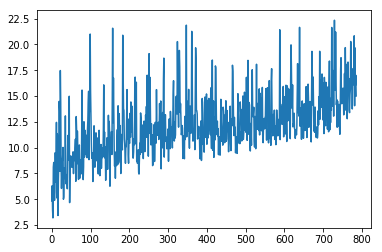

In [128]:
plt.plot(np.minimum(norms, 50), '-')

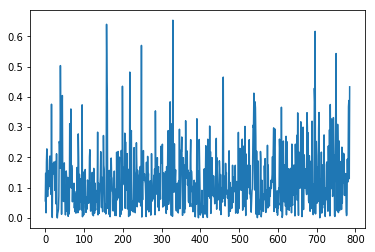

In [129]:
plt.plot(bellmans[num])

In [101]:
np.argmax(norms)

611

In [37]:
norms[-10:]

[18.25882,
 13.968602,
 18.935768,
 14.790593,
 15.920736,
 25.242369,
 21.964174,
 15.690662,
 16.759266,
 15.185252]

In [34]:
bellmans[num][-10:]

array([ 0.02974274,  0.14234932,  0.29319986,  0.17110213,  0.93041124,
        0.44007122,  0.66375246,  0.04679448,  0.06346042, 12.26950264])

In [126]:
np.abs(np.random.random(size=10))

array([0.69026288, 0.97610241, 0.21310688, 0.25247661, 0.28238127,
       0.59123431, 0.25253276, 0.51709609, 0.89591376, 0.50177449])

In [98]:
norms[-20:]

[65.848,
 19.09056,
 17.367935,
 22.156555,
 19.499144,
 15.366457,
 21.641083,
 17.833614,
 16.761194,
 19.090733,
 16.028679,
 16.419443,
 23.182627,
 20.833233,
 21.44269,
 14.481591,
 17.55101,
 13.448192,
 30.542316,
 13.73779]

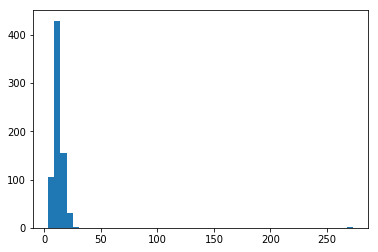

In [102]:
plt.hist(norms, bins=50);

In [52]:
43.11274-0.999*43.000065

0.15567506500000405

In [46]:
bellmans[num][:3]

array([0.15443899, 0.15567478, 0.04837341])

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50


array([[-0.46458435, 10.318831  , -1.671556  ]], dtype=float32)

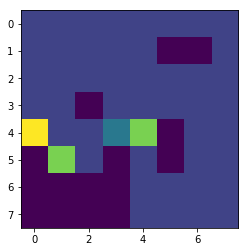

In [112]:
state = st[num][611]
#state = np.rot90(state)
#state = np.rot90(state)
#state = np.rot90(state)
#state = np.rot90(state)
img = sum([state[:,:,i]*(i+1) for i in range(5)])
plt.imshow(img)
aa.get_q_values([state], gpu_id=2, from_epoch=from_epoch)

In [61]:
np.linalg.norm(grad[num][890][0][0])

IndexError: list index out of range

In [29]:
norms

[24.609682,
 14.852001,
 13.856598,
 16.059,
 16.723822,
 14.858614,
 13.523892,
 12.57099,
 17.652782,
 12.958504,
 17.881718,
 13.63808,
 15.637628,
 16.999454,
 14.624116]

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50


array([[ 11.463609,  14.10663 , -34.39495 ]], dtype=float32)

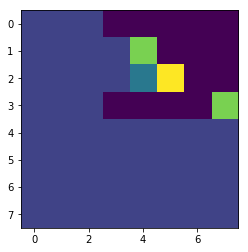

In [51]:
state = st[num][872]
#state = np.rot90(state)
#state = np.rot90(state)
#state = np.rot90(state)
#state = np.rot90(state)
img = sum([state[:,:,i]*(i+1) for i in range(5)])
plt.imshow(img)
aa.get_q_values([state], gpu_id=2, from_epoch=from_epoch)

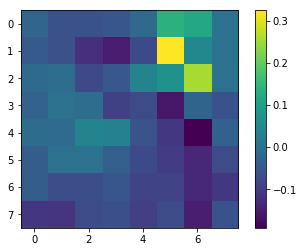

In [52]:
gr = grad[38][873][0][0]
plt.imshow(gr[:,:,4])
plt.colorbar()

In [83]:
(state[:,:,1]!=state[:,:,-1]).sum()

2

In [100]:
q_values = aa.get_q_values(st[num], gpu_id=2, from_epoch=from_epoch)

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50


In [103]:
q_spread = np.max(q_values, axis=1) - np.min(q_values, axis=1)

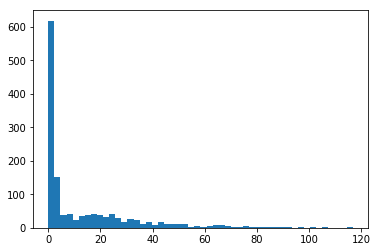

In [126]:
plt.hist(q_spread, bins=50);

In [110]:
np.argsort(q_spread)[::-1][:10]

array([ 544, 1045,  543, 1157, 1128,  762, 1275,  990,  729, 1335])

In [59]:
actions = np.random.randint(3, size=35)

In [75]:
config = aa.gpu_config(2)

with tf.Session(config=config) as sess:
    aa.saver.restore(sess, aa.path+"/model-"+str(from_epoch))
    #features = aa.agent_net.get_features(sess, st[0])
    #gradients = aa.agent_net.get_gradients(sess, st[72], actions)
    gr2 = aa.agent_net.get_gradients(sess, st[72][0].reshape(1, 8, 8, 5), actions[0].reshape(1, ))

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50


In [73]:
gr2[0][0].shape

(8, 8, 5)

In [72]:
gr1[0].shape

(8, 8, 5)

In [74]:
gr1[0]=gr2[0][0]

In [50]:
gr2[0][0].shape

(8, 8, 5)

In [51]:
gr1[0]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.99020386e+01, -1.18397743e+02,  1.39849243e+01,
         1.27430856e-01, -1.94481659e+01],
       [ 4.33639717e+01, -2.89101440e+02, -1.54107485e+01,
         5.09078836e+00, -2.25040493e+01],
       [-3.68004150e+01, -1.36711166e+02,  4.04458694e+01,
         3.96173835e+00,  8.86772537e+00]], dtype=float32)

In [54]:
gr2[0][0][0]==gr1[0]

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [55]:
np.linalg.norm(gr1-gr2[0][0])

5.4976892e-05

In [28]:
gr1 = gradients[0][0]

In [39]:
gr1[:,:,0]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  6.9902039e+01,  4.3363972e+01, -3.6800415e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  2.4298088e+01,  3.9720543e+01,  1.2715421e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -9.9838778e-02, -2.3712592e+00,  2.9424384e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0

In [44]:
gr2[0][0][:,:,0]

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  6.9902039e+01,  4.3363972e+01, -3.6800419e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  2.4298090e+01,  3.9720505e+01,  1.2715423e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -9.9839516e-02, -2.3712597e+00,  2.9424376e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0

In [20]:
actions = np.random.randint(3, size=35)

In [21]:
actions

array([0, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 0])

In [19]:
len(st[72])

35

In [53]:
norms = []
for i in range(features.shape[0]-1):
    norm = np.linalg.norm(features[i]-features[i+1])
    norms.append(norm)

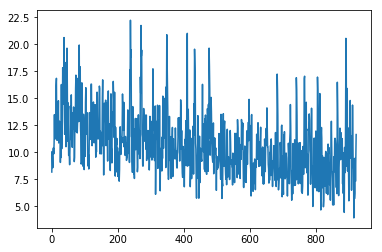

In [55]:
plt.plot(norms)

In [75]:
idx = np.argsort(norms)[::-1]
idx

array([238, 270, 410, 348,  37, 890,  83, 476,  46, 409, 432, 240, 272,
        82, 271, 239, 891, 349,  41, 477,  86, 433,  33, 306, 236, 682,
        73, 765, 268, 804, 740,  80, 764,  14, 434, 154, 350,  38, 186,
       864, 237,  91, 119, 120, 456,  29,  13, 144,  47, 346, 103, 894,
       145, 741,  72, 683,  85, 478, 171, 805, 137, 190, 269,  79, 811,
       179, 214,  59, 187, 336, 482, 153, 343, 597,  36, 390, 163, 903,
        20, 143,  34, 126, 770, 218, 102, 165,  49, 865, 159, 188, 430,
        35, 474, 722, 131, 910,  18, 320, 326, 313,  56, 245,  66, 215,
       651, 347, 786, 125, 278,  42, 471, 413, 162, 391, 344, 230, 351,
        57,  44, 483, 183, 114,  63, 107, 123, 519, 779,  40,  96, 512,
        17, 605,   8, 262, 286, 465,  67, 283,  70, 116, 160, 604, 742,
       442, 279, 684, 156, 297, 356, 136, 806, 170, 383, 386, 253, 312,
       257, 463,  75, 574, 562, 472, 513, 324, 117, 780,  97, 406,  84,
       889, 304, 523,  23, 846,  32, 316, 161,  81,  65, 595, 18

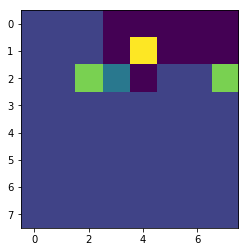

In [95]:
state = st[0][890]
img = sum([state[:,:,i]*(i+1) for i in [0, 1, 2, 3, 4]])
plt.imshow(img)

In [89]:
st[0][410][:,:,4]

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [90]:
st[0][410][:,:,1]

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [80]:
norms[410]

21.012585

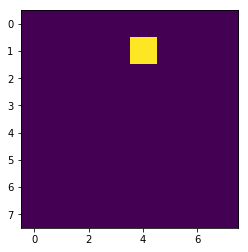

In [134]:
plt.imshow(state[:,:,4])

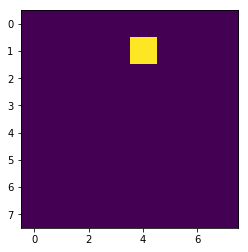

In [135]:
plt.imshow(state[:,:,1])

In [96]:
#state = st[20][0]
#state = np.rot90(state)
aa.get_q_values([state], gpu_id=2, from_epoch=6)

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d/model-6


array([[42.903915, 43.1573  , 43.29431 ]], dtype=float32)

In [89]:
qs[-2]

array([11.058722 ,  0.8006149, 26.021236 ], dtype=float32)

In [78]:
qs = aa.get_q_values(st[4], gpu_id=2, from_epoch=44)

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999/model-44


In [40]:
lengths

[184,
 275,
 233,
 314,
 220,
 255,
 354,
 304,
 402,
 433,
 347,
 405,
 457,
 420,
 472,
 548,
 541,
 556,
 566,
 713,
 672,
 590,
 593,
 678,
 685,
 693,
 712,
 882,
 809,
 784,
 682,
 612,
 762,
 738,
 708,
 865,
 894,
 763,
 884,
 953,
 765,
 802,
 860,
 703,
 1011,
 874,
 861,
 824,
 711,
 1083,
 805,
 857,
 705,
 721,
 816,
 730,
 778,
 753,
 838,
 1034,
 825,
 798,
 786,
 829,
 798,
 807,
 783,
 1045,
 741,
 967,
 828,
 811,
 800,
 875,
 880,
 935,
 879,
 723,
 872,
 808,
 916,
 966,
 1132,
 756,
 977,
 882,
 885,
 884,
 875,
 745,
 824,
 829,
 945,
 816,
 976,
 800,
 780,
 778,
 666,
 861]

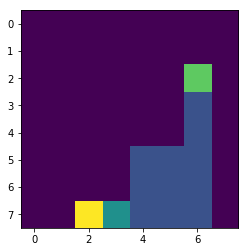

10

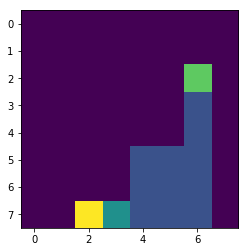

In [6]:
aa.play(gpu_id=1, max_episode_length=100, from_epoch=44)

In [68]:
config = aa.gpu_config(2)
from_epoch = 50

nums = [0, 1, 2, 3, 16]

svs = []
with tf.Session(config=config) as sess:
    aa.saver.restore(sess, aa.path+"/model-"+str(from_epoch))
    #features = aa.agent_net.get_features(sess, st[0])
    #gradients = aa.agent_net.get_gradients(sess, st[72], actions)
    for num in nums:
        tmp_svs = []
        for i in range(len(st[num]) - 1):
            sv = aa.get_fisher_singular_value(sess, st[num][i], rew[num][i], actions[num][i], st[num][i + 1], 1)
            tmp_svs.append(sv)
            
            
        svs.append(tmp_svs)

INFO:tensorflow:Restoring parameters from snake_models/dqn/boltzmann_8x8e999_5d_stupid/model-50
[43.63117]
[42.463127]
[42.667294]
[42.808907]
[42.744953]
[42.8405]
[42.792835]
[43.04979]
[42.954243]
[42.955154]
[42.941685]
[43.30499]
[42.906677]
[42.137993]
[42.12762]
[41.95541]
[42.059975]
[41.970493]
[42.10437]
[42.150642]
[42.1362]
[42.146328]
[42.194687]
[42.203636]
[42.265965]
[42.189922]
[42.29576]
[42.395187]
[42.46673]
[42.412098]
[42.37513]
[42.651737]
[41.55018]
[41.644848]
[41.60433]
[41.618515]
[41.501812]
[41.780373]
[41.9069]
[41.817173]
[41.83092]
[41.71271]
[41.5729]
[40.575672]
[40.69386]
[40.66557]
[40.689827]
[40.695007]
[40.88768]
[40.79497]
[40.784054]
[40.82066]
[40.9022]
[40.95812]
[41.149208]
[40.940845]
[40.89465]
[40.92653]
[40.90147]
[41.006256]
[41.077877]
[41.196716]
[41.128906]
[41.400368]
[41.0856]
[40.345516]
[40.410057]
[40.452118]
[40.411545]
[40.30424]
[40.286007]
[40.309856]
[40.462868]
[40.462708]
[40.459938]
[40.55898]
[40.498108]
[40.542114]
[40.

/Users/mathemage/snake_research/agents.py:605: RuntimeWarning: invalid value encountered in true_divide
  x0[i] = x_ / a


[36.155632]
[36.265602]
[36.09685]
[36.195152]
[36.06923]
[36.07943]
[36.136356]
[36.01984]
[36.259674]
[36.069798]
[36.112988]
[36.108036]
[36.138268]
[36.1627]
[36.118576]
[36.40809]
[36.3712]
[36.54082]
[36.532944]
[36.74276]
[36.797825]
[35.850544]
[36.001945]
[35.796383]
[36.125835]
[35.20826]
[35.287354]
[35.23207]
[35.264473]
[35.122646]
[35.22953]
[35.32254]
[35.183872]
[35.21555]
[35.117935]
[34.15341]
[34.19271]
[34.359917]
[34.35846]
[34.342987]
[34.398273]
[34.364887]
[34.49788]
[34.58084]
[34.60057]
[34.58589]
[34.603275]
[34.747623]
[34.695805]
[34.845066]
[34.829456]
[34.85683]
[34.873737]
[34.97842]
[34.96513]
[35.009743]
[34.566357]
[33.875553]
[33.96075]
[34.039707]
[34.019527]
[34.063393]
[33.987873]
[34.166782]
[34.10295]
[34.06587]
[34.136547]
[34.154343]
[34.014465]
[33.944546]
[33.953716]
[34.25013]
[34.056683]
[33.99599]
[33.94729]
[34.22726]
[34.21118]
[34.253372]
[34.00087]
[32.97214]
[33.076614]
[32.991516]
[33.031513]
[32.891277]
[32.94128]
[32.91234]
[32.84

[39.262573]
[39.526733]
[39.474724]
[39.2534]
[39.478947]
[39.48937]
[38.561676]
[38.609364]
[38.719707]
[38.902336]
[38.802948]
[38.869793]
[38.93274]
[38.874542]
[37.740616]
[37.93998]
[38.196613]
[37.915844]
[37.939877]
[37.666862]
[37.893944]
[37.947353]
[37.98087]
[38.10876]
[38.092247]
[38.19005]
[38.07002]
[38.09453]
[38.19786]
[38.15449]
[38.27243]
[38.097828]
[38.122074]
[38.24944]
[38.171486]
[38.122417]
[38.205]
[37.94431]
[38.2493]
[38.368275]
[38.19585]
[38.403675]
[37.523857]
[37.249893]
[37.301086]
[37.498524]
[37.464554]
[37.68015]
[37.893784]
[36.681267]
[36.712753]
[36.78179]
[36.903694]
[36.990044]
[36.48673]
[36.442425]
[36.350506]
[36.45415]
[36.30979]
[36.45275]
[36.526066]
[36.38801]
[36.510365]
[36.374195]
[36.56168]
[36.592506]
[36.803074]
[36.963856]
[36.83667]
[36.977283]
[36.85375]
[36.686127]
[36.79803]
[36.934612]
[36.968437]
[37.025047]
[37.07627]
[37.006664]
[37.310425]
[37.12546]
[36.92234]
[37.051617]
[37.193794]
[37.145645]
[37.00541]
[37.288464]
[37.

[39.342728]
[39.344364]
[39.388744]
[39.25975]
[39.47351]
[39.472057]
[38.528877]
[38.484856]
[38.80187]
[38.52994]
[38.688972]
[38.73294]
[38.71455]
[38.811108]
[39.05031]
[38.058342]
[38.26463]
[38.095184]
[38.10284]
[37.96208]
[38.131207]
[38.04959]
[38.10497]
[37.948032]
[37.8527]
[37.957176]
[37.986588]
[38.049896]
[38.109238]
[38.088646]
[38.0098]
[38.13411]
[38.107967]
[38.095837]
[38.220963]
[38.10459]
[38.237247]
[38.02288]
[38.123245]
[38.110767]
[38.19619]
[38.06776]
[38.207508]
[38.270546]
[38.381104]
[38.409]
[38.676212]
[37.873283]
[38.18474]
[37.257042]
[37.32277]
[37.33149]
[37.406853]
[37.71789]
[36.701252]
[36.409676]
[35.28287]
[35.36067]
[35.29381]
[35.302265]
[35.47105]
[35.283436]
[35.472946]
[35.398773]
[35.521885]
[35.62379]
[35.670265]
[35.5685]
[35.687233]
[35.669716]
[35.9594]
[35.842194]
[36.097343]
[35.94814]
[35.91119]
[35.809185]
[36.039272]
[35.834618]
[35.834553]
[36.187084]
[35.906574]
[35.0468]
[34.942604]
[35.121002]
[35.019836]
[34.933704]
[35.00289

[43.71997]
[43.4178]
[42.43726]
[42.83406]
[42.682655]
[42.67164]
[42.897152]
[42.766182]
[42.709606]
[42.752842]
[42.48173]
[42.4178]
[42.43726]
[42.83406]
[42.682655]
[42.67164]
[42.897152]
[42.766182]
[42.709606]
[42.643627]
[42.579052]
[42.70566]
[42.6969]
[42.695072]
[42.62482]
[42.66567]
[42.72826]
[42.67024]
[42.747486]
[42.78941]
[42.72096]
[42.700188]
[42.718426]
[42.774303]
[42.840263]
[42.800983]
[42.92062]
[42.96618]
[43.07433]
[42.913986]
[42.91299]
[42.80314]
[41.69473]
[41.69886]
[41.83471]
[42.130146]
[41.95432]
[42.125595]
[42.12585]
[42.017456]
[42.037575]
[42.067776]
[42.125046]
[42.168594]
[42.12556]
[42.164135]
[42.103012]
[42.17781]
[42.210484]
[42.22222]
[42.31115]
[42.494553]
[42.644398]
[41.72453]
[42.23534]
[40.601746]
[40.838417]
[40.867977]
[40.87909]
[40.839493]
[40.946365]
[41.095734]
[40.828114]
[40.929287]
[40.926792]
[41.082054]
[40.74294]
[40.93004]
[40.665215]
[40.80584]
[40.89424]
[40.950203]
[41.087414]
[41.06104]
[41.06847]
[41.068356]
[41.057762]


[14.03561]
[14.1040945]
[14.030643]
[14.12463]
[14.066137]
[14.051167]
[14.239172]
[14.210095]
[14.221959]
[14.385298]
[14.211459]
[14.351546]
[13.391955]
[13.563923]
[13.247958]
[13.264983]
[13.679762]
[14.16058]
[13.766868]
[13.622586]
[12.59511]
[12.27436]
[12.055799]
[12.0930195]
[12.077823]
[12.256136]
[12.085545]
[12.069738]
[10.923493]
[11.180264]
[10.860524]
[11.3996935]
[11.153156]
[10.579597]
[10.292209]
[10.483628]
[10.38081]
[10.572156]
[10.628007]
[10.526894]
[9.384539]
[9.529945]
[9.620096]
[8.356193]
[8.67445]
[8.687514]
[8.7547655]
[8.7145815]
[8.458674]
[7.3384576]
[7.2444353]
[7.6309276]
[7.7425265]
[7.630775]
[6.4265585]
[6.3860097]
[6.3680215]
[6.2480865]
[5.1326203]
[5.39915]
[5.5877547]
[4.039386]
[3.2912827]
[3.0604765]
[3.1035223]
[3.2187493]
[2.4344785]
[1.8669593]
[43.38112]
[43.483753]
[43.510757]
[43.58565]
[43.542603]
[43.67166]
[43.018593]
[42.840904]
[42.9774]
[42.994915]
[42.797264]
[42.006077]
[41.965622]
[42.05649]
[42.044006]
[42.453426]
[42.092556]
[

[19.957674]
[19.814127]
[19.931824]
[19.87486]
[19.732407]
[19.82031]
[19.941933]
[19.049528]
[19.00476]
[19.011023]
[19.004148]
[18.95174]
[19.02347]
[18.149292]
[18.16905]
[18.1878]
[17.962883]
[18.048462]
[18.05372]
[17.92784]
[18.065966]
[18.230358]
[18.356417]
[18.46463]
[18.41064]
[18.364143]
[18.752844]
[17.822725]
[17.54023]
[17.530901]
[17.321842]
[17.711782]
[16.63778]
[16.623262]
[16.811174]
[16.791533]
[16.742062]
[16.72509]
[16.77962]
[16.902706]
[16.684166]
[16.829926]
[16.822893]
[16.730679]
[16.68182]
[16.763319]
[16.887186]
[15.483921]
[15.624198]
[15.460006]
[15.419439]
[15.401426]
[15.800397]
[15.712507]
[15.533924]
[15.841869]
[14.542674]
[14.761218]
[14.614867]
[14.842695]
[15.096176]
[15.314596]
[14.170203]
[13.925423]
[14.196492]
[14.223038]
[14.290625]
[14.058718]
[14.082486]
[13.854612]
[13.99681]
[12.973188]
[12.934217]
[13.029025]
[12.975558]
[12.730132]
[11.645032]
[11.637429]
[10.703768]
[10.464168]
[10.673513]
[10.550654]
[10.487108]
[10.786772]
[9.859995]

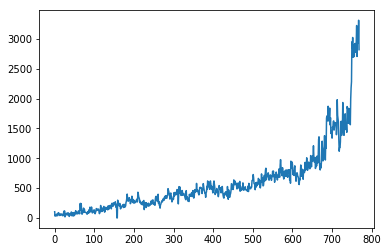

In [82]:
plt.plot(svs[0])

In [67]:
sum(rew[16])

53

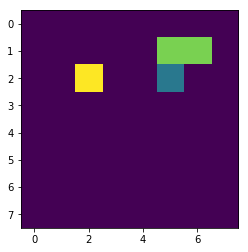

In [41]:
plt.imshow(s2im(st[5][9]))